In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("C:/Users/stefa/OneDrive/Kaggle/train.csv")
train_data = train_data.drop(["Id"], axis=1)
print(train_data.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     20850

In [3]:
print(train_data.shape)

(1460, 80)


In [4]:
print(train_data.describe())
print(train_data.info())
print(train_data.isnull().sum(axis=0))

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

In [5]:
cols_with_nan = [train_data.columns[i] for i in range(0, len(train_data.columns)) if train_data.isnull().sum(axis=0)[i]
                > 0]
print(cols_with_nan)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
train_data[cols_with_nan].info()
train_data[cols_with_nan].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: float64(3), object(16)
memory usage: 216.8+ KB


,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


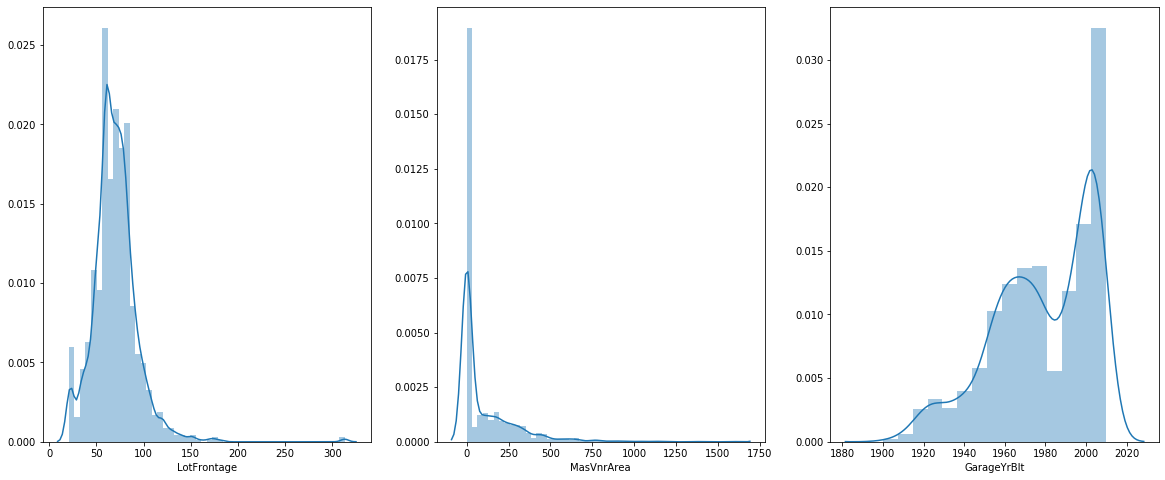

In [7]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.distplot(train_data["LotFrontage"].dropna())
plt.subplot(1,3,2)
sns.distplot(train_data["MasVnrArea"].dropna())
plt.subplot(1,3,3)
sns.distplot(train_data["GarageYrBlt"].dropna())
plt.show()

In [8]:
from sklearn.impute import SimpleImputer

cols_with_nan_num = [cname for cname in cols_with_nan if train_data[cname].dtype in ["float64","int64"]]
cols_with_nan_cat = [cname for cname in cols_with_nan if train_data[cname].dtype in ["object"]]
cols_with_none_cat = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
                      "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

# Impute missing values in numerical columns that contain missing observations
num_imputer = SimpleImputer(strategy="median")
train_data[cols_with_nan_num] = pd.DataFrame(num_imputer.fit_transform(train_data[cols_with_nan_num]))

# Impute categorical features where NA is a valid value that represents none
none_imputer = SimpleImputer(strategy="constant", fill_value="none")
train_data[cols_with_none_cat] = pd.DataFrame(none_imputer.fit_transform(train_data[cols_with_none_cat]))

# Impute missing values in categorical columns that contain missing observations
cat_imputer = SimpleImputer(strategy="most_frequent")
train_data[cols_with_nan_cat] = pd.DataFrame(cat_imputer.fit_transform(train_data[cols_with_nan_cat]))

print(train_data[cols_with_nan_num].info(), "\n")
print(train_data[cols_with_none_cat].info(), "\n")
print(train_data[cols_with_nan_cat].info(), "\n")
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
LotFrontage    1460 non-null float64
MasVnrArea     1460 non-null float64
GarageYrBlt    1460 non-null float64
dtypes: float64(3)
memory usage: 34.3 KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
Alley           1460 non-null object
BsmtQual        1460 non-null object
BsmtCond        1460 non-null object
BsmtExposure    1460 non-null object
BsmtFinType1    1460 non-null object
BsmtFinType2    1460 non-null object
FireplaceQu     1460 non-null object
GarageType      1460 non-null object
GarageFinish    1460 non-null object
GarageQual      1460 non-null object
GarageCond      1460 non-null object
PoolQC          1460 non-null object
Fence           1460 non-null object
MiscFeature     1460 non-null object
dtypes: object(14)
memory usage: 159.8+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entri

In [9]:
cat_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ["object"] 
            or cname in ["MSSubClass", "OverallQual", "OverallCond"]]
cat_features = cat_cols
num_cols = [cname for cname in train_data.columns if cname not in cat_cols]
num_cols_copy = num_cols.copy()
num_cols_copy.remove("SalePrice")
num_features = num_cols_copy

print(cat_features, "\n")
print(num_cols, "\n")
print(num_features)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Encl

In [10]:
print("Number of numerical features:", len(num_features))
print("Number of categorical features:", len(cat_features))

Number of numerical features: 33
Number of categorical features: 46


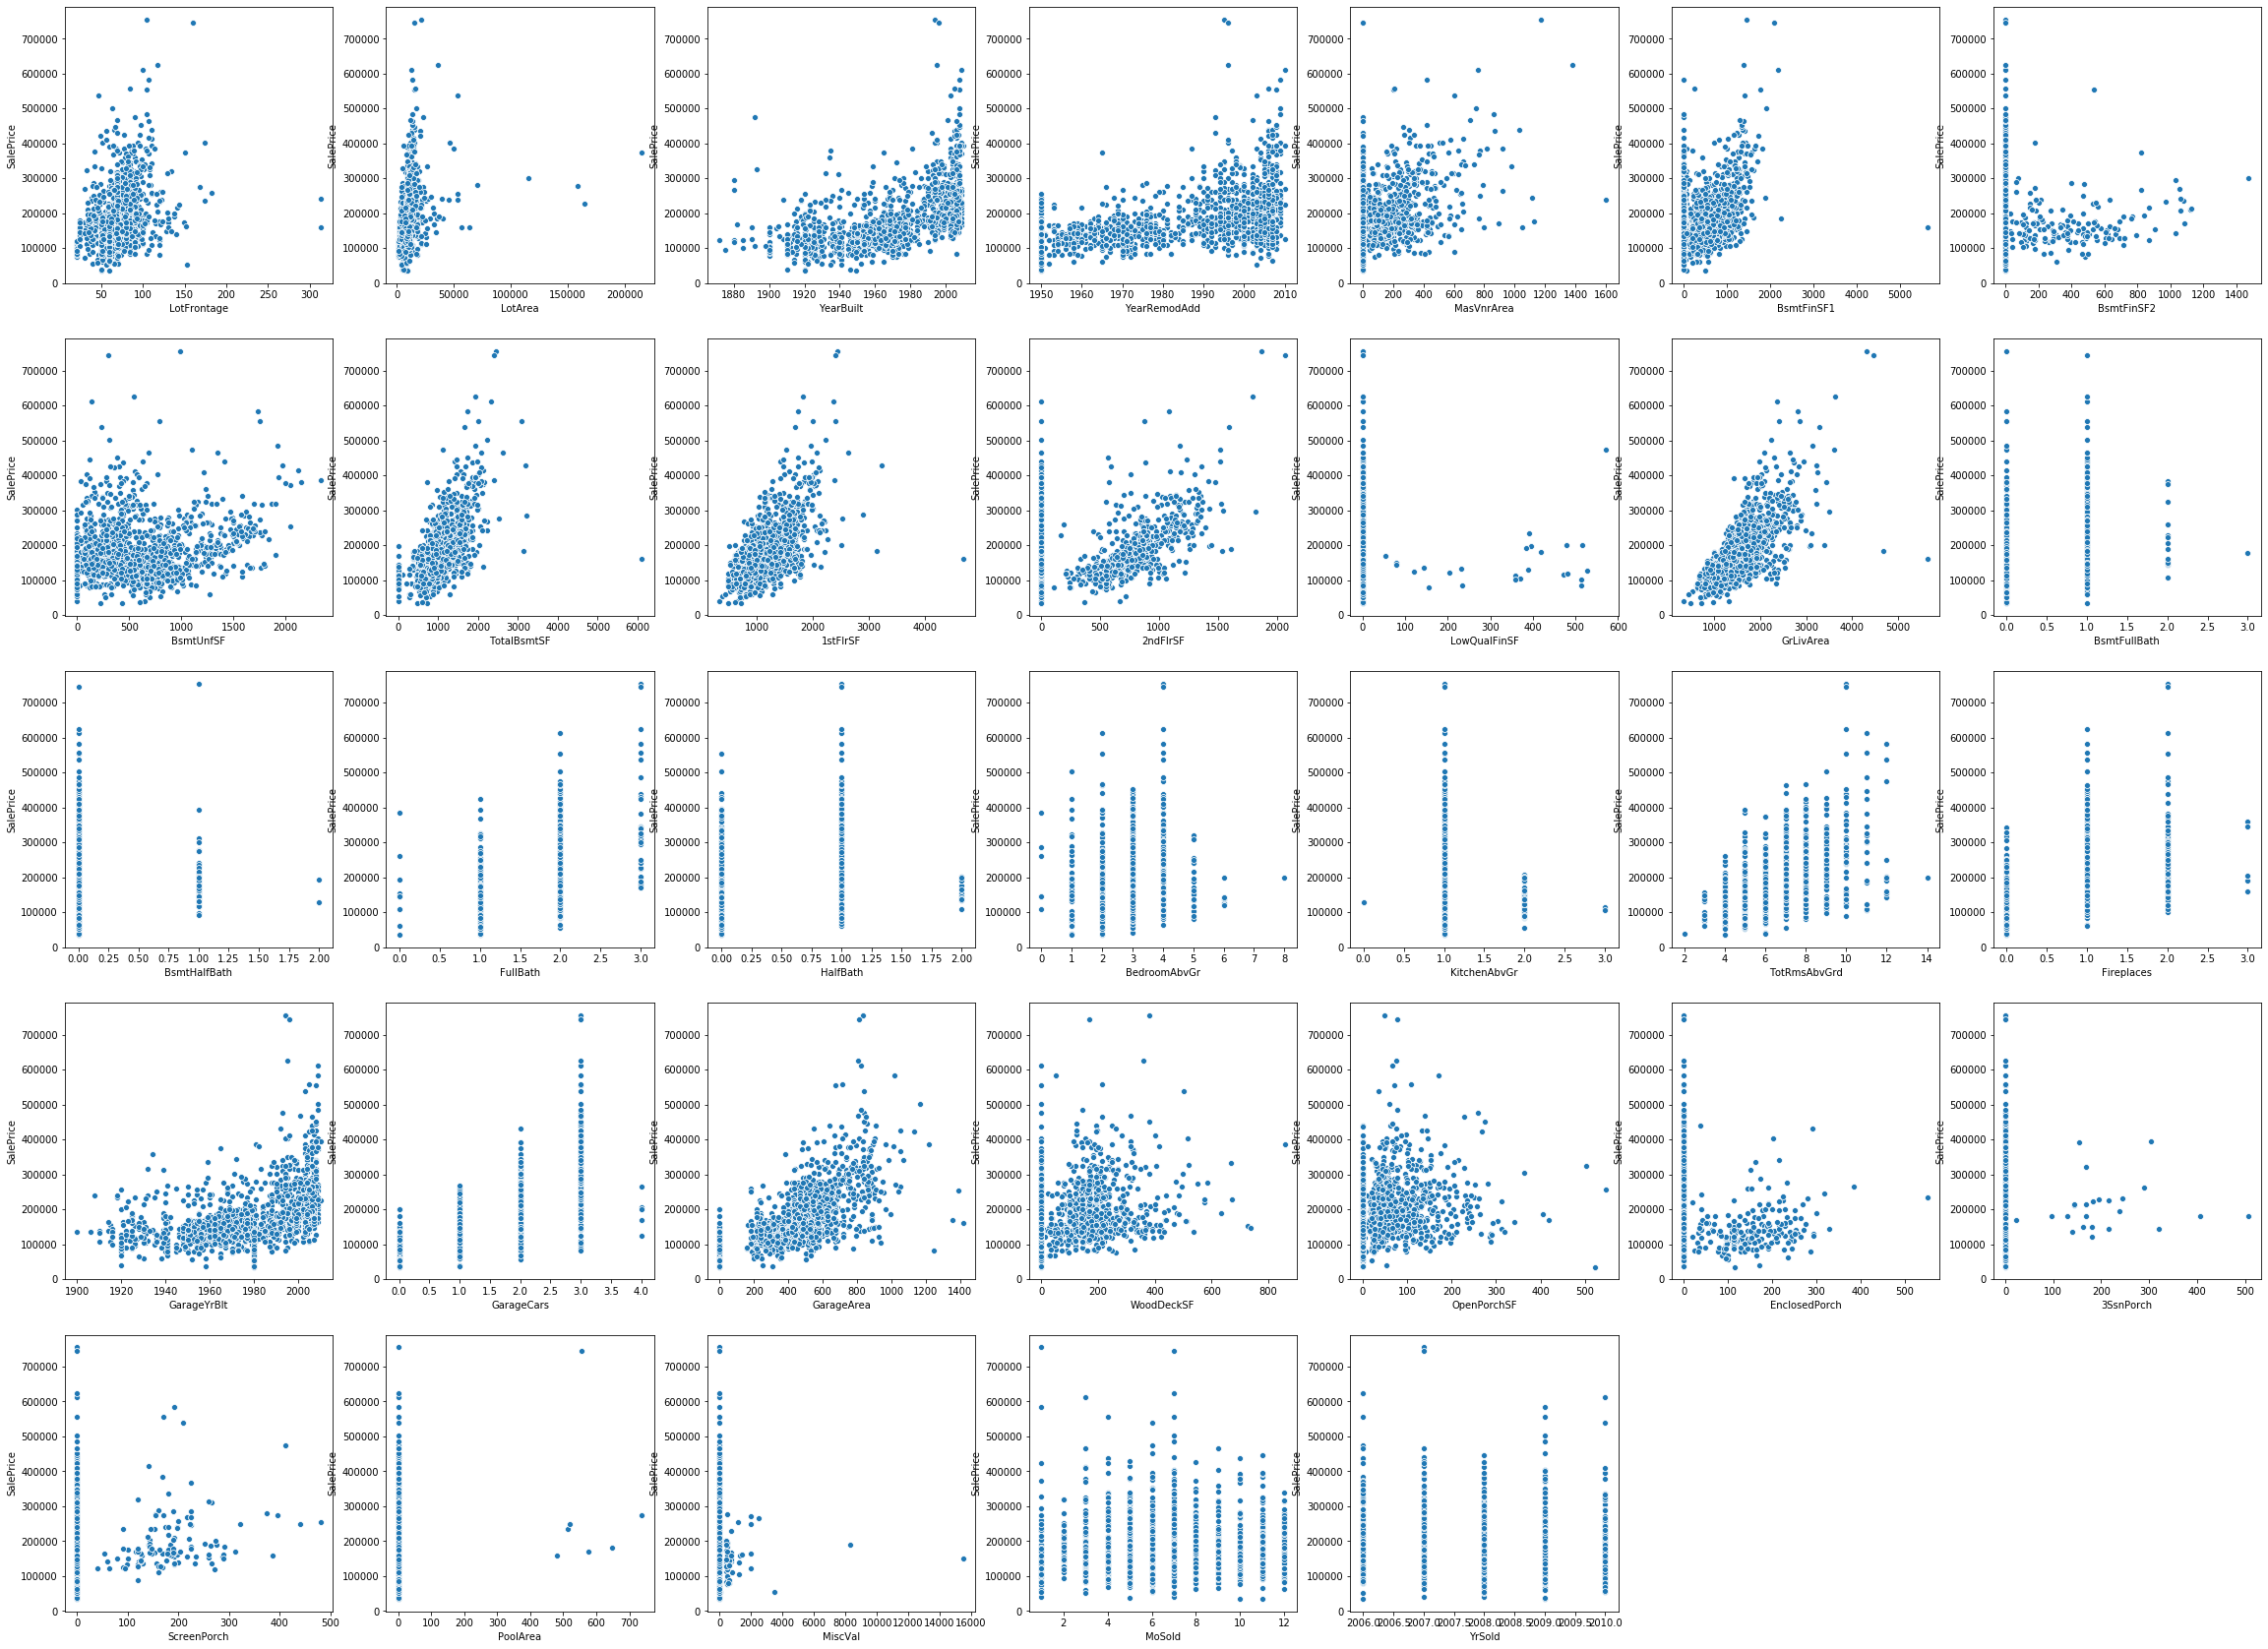

In [11]:
plt.figure(figsize=(40,30))
for i in range(0, len(num_features), 1):
    plt.subplot(5, 7, i+1)
    sns.scatterplot(x=train_data[num_features[i]], y=train_data["SalePrice"])
plt.show()

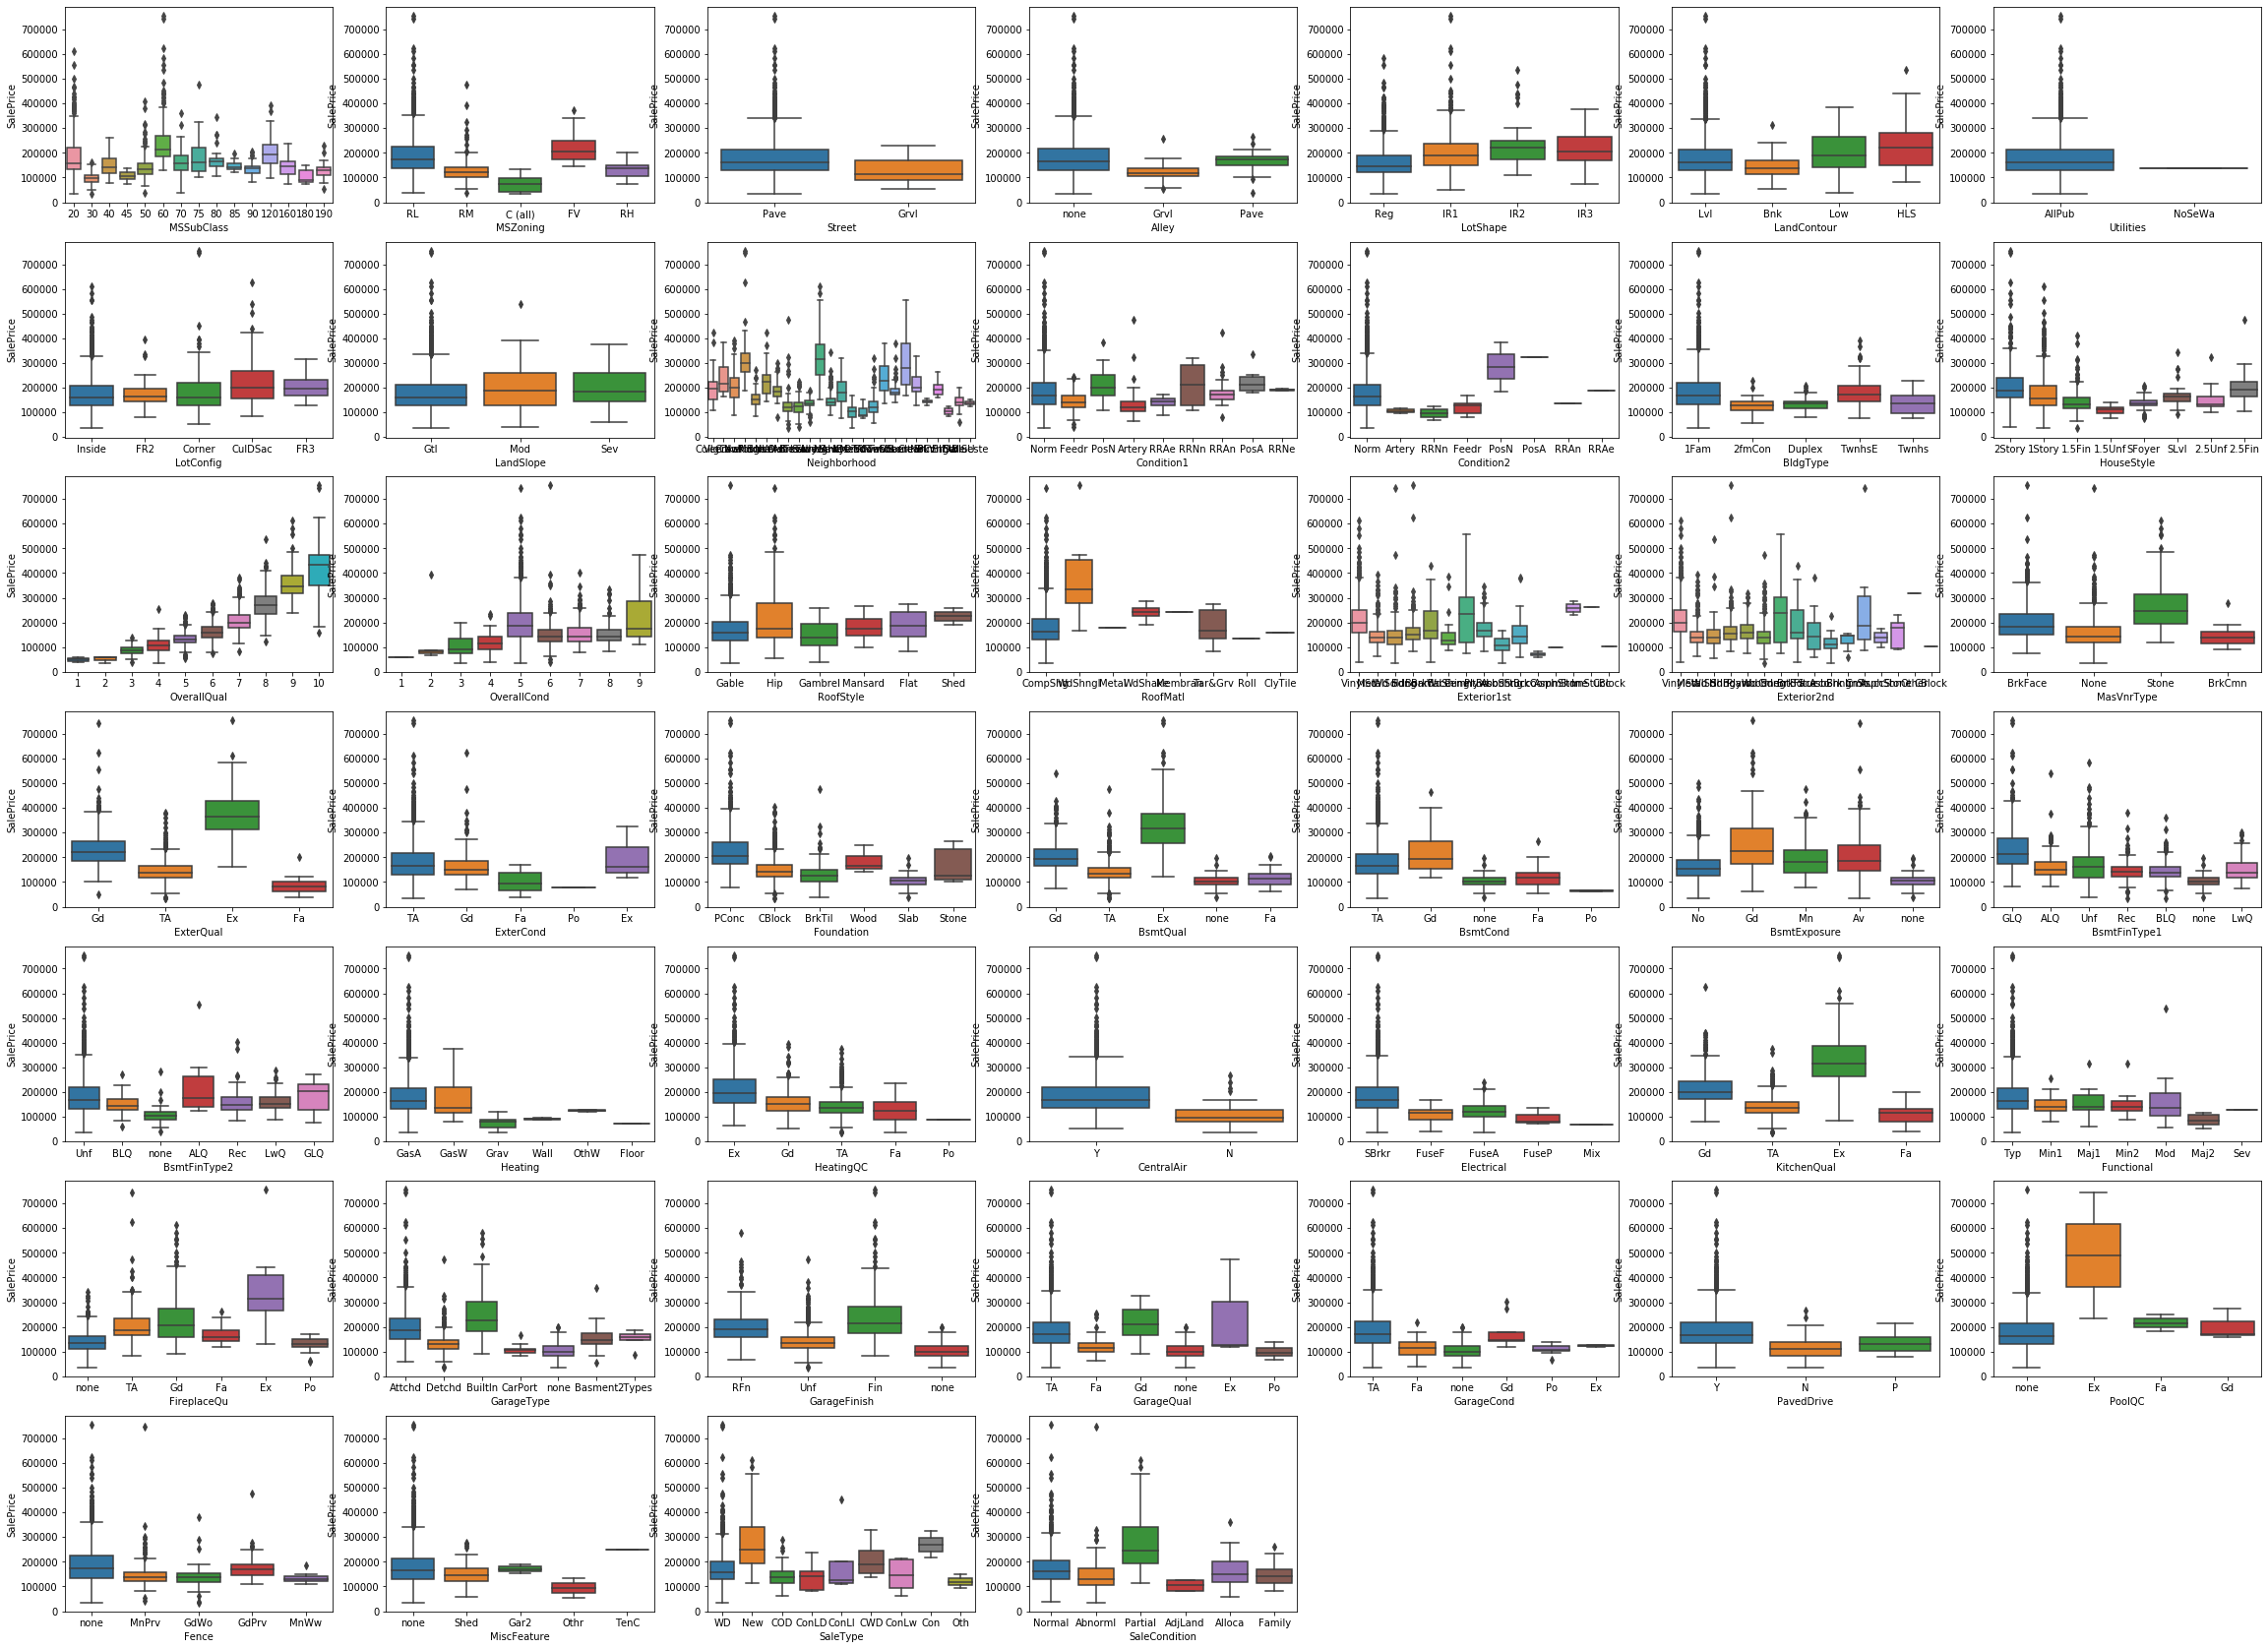

In [12]:
plt.figure(figsize=(40,30))
for i in range(0, len(cat_features), 1):
    plt.subplot(7, 7, i+1)
    sns.boxplot(x=train_data[cat_features[i]], y=train_data["SalePrice"])
plt.show()

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

y = train_data["SalePrice"]
X = train_data.drop(["SalePrice"], axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


preprocessor = ColumnTransformer([("num_scaler", StandardScaler(), num_features),
                                 ("cat_encoding", OneHotEncoder(handle_unknown="ignore"), cat_features)])

# XGBoost with all features
model = XGBRegressor(n_estimators=1000, random_state=1, learning_rate=0.05)

pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)])

pipeline.fit(train_X, train_y)
preds = pipeline.predict(val_X)
mae = mean_absolute_error(val_y, preds)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 16827.643150684933


In [14]:
unique_cat_values = train_X[cat_features].nunique().sum()
print("Total number of features after preprocessing:", unique_cat_values + len(num_features))

Total number of features after preprocessing: 328


In [15]:
def get_mae_scores_forest(X_train, X_valid, y_train, y_valid, k_features_list):
    mae_scores = []
    
    for i in k_features_list:
        reg_model = RandomForestRegressor(n_estimators=1000, random_state=1)
        selector = SelectKBest(mutual_info_regression, k=i)
        pipeline = Pipeline([("preprocessor", preprocessor),
                             ("selector", selector),
                            ("reg_model", reg_model)])
        pipeline.fit(X_train, y_train)
        val_predictions = pipeline.predict(X_valid)
        mae_score = mean_absolute_error(y_valid, val_predictions)
        mae_scores.append(("k = " + str(i), mae_score))
    
    return mae_scores

def get_mae_scores_xgb(X_train, X_valid, y_train, y_valid, k_features_list):
    mae_scores = []
    
    for i in k_features_list:
        reg_model = XGBRegressor(n_estimators=1000, random_state=1, learning_rate=0.05)
        selector = SelectKBest(mutual_info_regression, k=i)
        pipeline = Pipeline([("preprocessor", preprocessor),
                            ("selector", selector),
                            ("reg_model", reg_model)])
        pipeline.fit(X_train, y_train)
        val_predictions = pipeline.predict(X_valid)
        mae_score = mean_absolute_error(y_valid, val_predictions)
        mae_scores.append(("k = " + str(i), mae_score))
        
    return mae_scores

k_features = [50, 100, 150, 200, 250, 300]    
scores = get_mae_scores_forest(train_X, val_X, train_y, val_y, k_features) 
print("Performance of Random Forest \n")
print("Mean Absolute Errors", scores, "\n")

scores2 = get_mae_scores_xgb(train_X, val_X, train_y, val_y, k_features)
print("Performance of XGBoosted Regression \n")
print("Mean Absolute Errors", scores2)

Performance of Random Forest 

Mean Absolute Errors [('k = 50', 17914.55444350946), ('k = 100', 17465.339247358123), ('k = 150', 17282.951592563604), ('k = 200', 17292.5655444227), ('k = 250', 17270.72141369863), ('k = 300', 17245.903315851272)] 

Performance of XGBoosted Regression 

Mean Absolute Errors [('k = 50', 18381.442733304793), ('k = 100', 17750.281142979453), ('k = 150', 17421.946286386985), ('k = 200', 17420.68341181507), ('k = 250', 16946.422356592466), ('k = 300', 17068.195408818494)]


In [16]:
# XGBoost with numerical features only
model2 = XGBRegressor(n_estimators=1000, random_state=1, learning_rate=0.05)
model2.fit(train_X[num_features], train_y)
preds2 = model2.predict(val_X[num_features])
mae2 = mean_absolute_error(val_y, preds2)
print(mae2)

18581.916802226027


In [17]:
# Custom XGBoost
num_features2 = ['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea']
cat_features2 = ['MSSubClass', 'MSZoning', 'LotFrontage', 'Alley', 'Neighborhood', 'Condition1', 'Condition2', 
                'OverallQual', 'MasVnrType', 'ExterQual', 'KitchenQual', 'GarageFinish', 'GarageQual']

preprocessor2 = ColumnTransformer([("num_scaler", StandardScaler(), num_features2),
                                 ("cat_encoding", OneHotEncoder(handle_unknown="ignore"), cat_features2)])

model_custom = XGBRegressor(n_estimators=1000, random_state=1, learning_rate=0.05)

pipeline_custom = Pipeline([('preprocessor2', preprocessor2),
                           ('model_custom', model_custom)])
pipeline_custom.fit(train_X[num_features2 + cat_features2], train_y)
preds_custom = pipeline_custom.predict(val_X[num_features2 + cat_features2])
mae_custom = mean_absolute_error(val_y, preds_custom)
print("Mean Absolute Error", mae_custom)

Mean Absolute Error 19598.070697773972


In [18]:
# XGBoost with cardinality < 10
low_card_cat_features = [cname for cname in cat_features if train_X[cname].nunique() < 10]
training_features_low_card = num_features + low_card_cat_features

preprocessor_low_card = ColumnTransformer([("num_scaler", StandardScaler(), num_features),
                                 ("cat_encoding", OneHotEncoder(handle_unknown="ignore"), low_card_cat_features)])

model_low_card = XGBRegressor(n_estimators=1000, random_state=1, learning_rate=0.05)

pipeline_low_card = Pipeline([('preprocessor_low_card', preprocessor_low_card),
                           ('model_low_card', model_low_card)])
pipeline_low_card.fit(train_X[training_features_low_card], train_y)
preds_low_card = pipeline_low_card.predict(val_X[training_features_low_card])
mae_low_card = mean_absolute_error(val_y, preds_low_card)
print("Mean Absolute Error", mae_low_card)

Mean Absolute Error 17268.80779109589


In [19]:
k_features = [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]    
scores3 = get_mae_scores_xgb(train_X, val_X, train_y, val_y, k_features)
print("Performance of XGBoosted Regression \n")
print("Mean Absolute Errors", scores3)

Performance of XGBoosted Regression 

Mean Absolute Errors [('k = 200', 17267.7776755137), ('k = 210', 17046.946125856164), ('k = 220', 16938.915860445206), ('k = 230', 16649.020633561642), ('k = 240', 17283.61365582192), ('k = 250', 17186.519820205478), ('k = 260', 17031.49636130137), ('k = 270', 17053.210787671233), ('k = 280', 16799.66671660959), ('k = 290', 16938.05038527397), ('k = 300', 17025.557577054795)]


In [20]:
from sklearn.model_selection import GridSearchCV

# Tune for number of estimators in the XGBoosted regression model while fixing the other parameters
gsc = GridSearchCV(estimator=XGBRegressor(random_state=1, learning_rate=0.05, max_depth=5, min_child_weight=1, gamma=0,
                                         subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, 
                                        objective="reg:squarederror", eval_metric="mae"),
                  param_grid={"n_estimators" : [i for i in range(100, 1000, 50)]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

selector = SelectKBest(mutual_info_regression, k=280)

pipeline_gsc = Pipeline([("preprocessor", preprocessor),
                    ("selector", selector),
                    ("gsc", gsc)])
pipeline_gsc.fit(train_X, train_y)
print(gsc.best_params_)

{'n_estimators': 600}


In [21]:
# Tune for max_depth and min_child_weight, leaving the other parameters fixed

gsc2 = GridSearchCV(estimator=XGBRegressor(n_estimators=700, random_state=1, learning_rate=0.05, gamma=0,
                                         subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, 
                                        objective="reg:squarederror", eval_metric="mae"),
                  param_grid={"max_depth":[i for i in range(3,11,1)],
                             "min_child_weight":[i for i in range(1,7,1)]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

pipeline_gsc2 = Pipeline([("preprocessor", preprocessor),
                    ("selector", selector),
                    ("gsc2", gsc2)])
pipeline_gsc2.fit(train_X, train_y)
print(gsc2.best_params_)

{'max_depth': 4, 'min_child_weight': 2}


In [22]:
# Tune for gamma, leaving the other parameters fixed
gsc3 = GridSearchCV(estimator=XGBRegressor(n_estimators=700, random_state=1, learning_rate=0.05, max_depth=5, 
                                           min_child_weight=1, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, 
                                        objective="reg:squarederror", eval_metric="mae"),
                  param_grid={"gamma":[(i/10.0) for i in range(0, 5, 1)]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

pipeline_gsc3 = Pipeline([("preprocessor", preprocessor),
                    ("selector", selector),
                    ("gsc3", gsc3)])
pipeline_gsc3.fit(train_X, train_y)
print(gsc3.best_params_)

{'gamma': 0.0}


In [23]:
# Tune for subsample and colsample_bytree, leaving the other parameters fixed

gsc4 = GridSearchCV(estimator=XGBRegressor(n_estimators=700, random_state=1, learning_rate=0.05, max_depth=5, 
                                           min_child_weight=1, gamma=0, scale_pos_weight=1, 
                                        objective="reg:squarederror", eval_metric="mae"),
                  param_grid={"subsample":[(i/10.0) for i in range(6, 10, 1)],
                             "colsample_bytree":[(i/10.0) for i in range(6, 10, 1)]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

pipeline_gsc4 = Pipeline([("preprocessor", preprocessor),
                    ("selector", selector),
                    ("gsc4", gsc4)])
pipeline_gsc4.fit(train_X, train_y)
print(gsc4.best_params_)

{'colsample_bytree': 0.9, 'subsample': 0.6}


In [24]:
# Tune for regularization parameters, leaving the other parameters fixed

gsc5 = GridSearchCV(estimator=XGBRegressor(n_estimators=700, random_state=1, learning_rate=0.05, max_depth=5, 
                                           min_child_weight=1, gamma=0, scale_pos_weight=1,subsample=0.6, 
                                           colsample_bytree=0.8, objective="reg:squarederror", eval_metric="mae"),
                  param_grid={"reg_alpha":[1e-5, 1e-2, 0.1, 1, 10, 100],
                             "reg_lambda":[1e-5, 1e-2, 0.1, 1, 10, 100]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

pipeline_gsc5 = Pipeline([("preprocessor", preprocessor),
                    ("selector", selector),
                    ("gsc5", gsc5)])
pipeline_gsc5.fit(train_X, train_y)
print(gsc5.best_params_)

{'reg_alpha': 100, 'reg_lambda': 1}


In [25]:
# Tune for the learning rate, leaving the other parameters fixed
gsc6 = GridSearchCV(estimator=XGBRegressor(n_estimators=700, random_state=1, max_depth=5, 
                                           min_child_weight=1, gamma=0, scale_pos_weight=1,subsample=0.6, 
                                           colsample_bytree=0.8, reg_alpha=100, reg_lambda=1,
                                           objective="reg:squarederror", eval_metric="mae"),
                  param_grid={"learning_rate":[0.001, 0.01, 0.05, 0.1, 0.15, 0.2]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

pipeline_gsc6 = Pipeline([("preprocessor", preprocessor),
                    ("selector", selector),
                    ("gsc6", gsc6)])
pipeline_gsc6.fit(train_X, train_y)
print(gsc6.best_params_)

{'learning_rate': 0.05}


In [26]:
final_model = XGBRegressor(learning_rate=0.05, n_estimators=700, random_state=1, max_depth=5, min_child_weight=1, 
                           gamma=0, scale_pos_weight=1,subsample=0.6, colsample_bytree=0.8, reg_alpha=100, 
                           reg_lambda=1, objective="reg:squarederror", eval_metric="mae")
final_pipeline = Pipeline([("preprocessor", preprocessor),
                          ("selector", selector),
                          ("final_model", final_model)])

selector = SelectKBest(mutual_info_regression, k=650)

final_pipeline.fit(train_X, train_y)
final_preds = final_pipeline.predict(val_X)
final_mae = mean_absolute_error(val_y, final_preds)
print("Mean Absolute Error", final_mae)

Mean Absolute Error 15148.424004708904


In [27]:
test_data = pd.read_csv("C:/Users/stefa/OneDrive/Kaggle/test.csv")
ids = test_data["Id"]
test_data = test_data.drop(["Id"], axis=1)

cols_with_nan = [test_data.columns[i] for i in range(0, len(test_data.columns)) if test_data.isnull().sum(axis=0)[i]
                > 0]
cols_with_nan_num = [cname for cname in cols_with_nan if test_data[cname].dtype in ["float64","int64"]]
cols_with_nan_cat = [cname for cname in cols_with_nan if test_data[cname].dtype in ["object"]]

test_data[cols_with_nan_num] = pd.DataFrame(num_imputer.fit_transform(test_data[cols_with_nan_num]))
test_data[cols_with_none_cat] = pd.DataFrame(none_imputer.fit_transform(test_data[cols_with_none_cat]))
test_data[cols_with_nan_cat] = pd.DataFrame(cat_imputer.fit_transform(test_data[cols_with_nan_cat]))

print(test_data[cols_with_nan_num].info(), "\n")
print(test_data[cols_with_none_cat].info(), "\n")
print(test_data[cols_with_nan_cat].info(), "\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
LotFrontage     1459 non-null float64
MasVnrArea      1459 non-null float64
BsmtFinSF1      1459 non-null float64
BsmtFinSF2      1459 non-null float64
BsmtUnfSF       1459 non-null float64
TotalBsmtSF     1459 non-null float64
BsmtFullBath    1459 non-null float64
BsmtHalfBath    1459 non-null float64
GarageYrBlt     1459 non-null float64
GarageCars      1459 non-null float64
GarageArea      1459 non-null float64
dtypes: float64(11)
memory usage: 125.5 KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
Alley           1459 non-null object
BsmtQual        1459 non-null object
BsmtCond        1459 non-null object
BsmtExposure    1459 non-null object
BsmtFinType1    1459 non-null object
BsmtFinType2    1459 non-null object
FireplaceQu     1459 non-null object
GarageType      1459 non-null object
GarageFinish    1459 n

In [28]:
test_preds = final_pipeline.predict(test_data)
print(test_preds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

[124912.04 158617.77 197997.14 ... 173646.48 122100.68 225496.14]
